In [7]:

class SuffixTrie():
    """ Encapsulates a suffix trie of a provided string t """
    
    def __init__(self, t):
        """ Make suffix trie from t """
        t += '$'  # terminator symbol
        self.root = {}
        for i in range(len(t)):  # for each suffix
            cur = self.root
            for c in t[i:]:  # for each character in i'th suffix
                if c not in cur:
                    cur[c] = {}  # add outgoing edge if necessary
                cur = cur[c]
    
    def follow_path(self, s):
        """ Follow path given by characters of s.  Return node at
            end of path, or None if we fall off. """
        cur = self.root
        for c in s:
            if c not in cur:
                return None  # no outgoing edge on next character
            cur = cur[c]  # descend one level
        return cur
    
    def has_substring(self, s):
        """ Return true if s appears as a substring of t """
        return self.follow_path(s) is not None
    
    def has_suffix(self, s):
        """ Return true if s is a suffix of t """
        node = self.follow_path(s)
        return node is not None and '$' in node
    
    def to_dot(self):
        """ Return dot representation of trie to make a picture """
        lines = []
        def _to_dot_helper(node, parid):
            childid = parid
            for c, child in node.items():
                lines.append('  %d -> %d [ label="%s" ];' % (parid, childid+1, c))
                childid = _to_dot_helper(child, childid+1)
            return childid
        lines.append('digraph "Suffix trie" {')
        lines.append('  node [shape=circle label=""];')
        _to_dot_helper(self.root, 0)
        lines.append('}')
        return '\n'.join(lines) + '\n'



In [8]:
strie = SuffixTrie('there would have been a time for such a word')

In [9]:
strie.has_substring('nope')

False

In [10]:
strie.has_substring('would have been')

True

In [11]:
strie.has_substring('such a word')

True

In [12]:
strie.has_suffix('would have been')

False

In [13]:
strie.has_suffix('such a word')

True

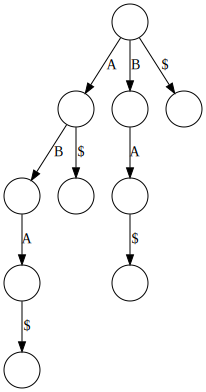

In [32]:
#!pip install graphviz
from graphviz import Source

st = SuffixTrie("ABA")
dot = st.to_dot()
Source(dot)
